# **Data Preprocessing**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('datasets_house_prices.csv')

In [35]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [36]:
data.fillna(data.mean(), inplace=True)

In [37]:
normalized_data = (data - data.mean()) / data.std()

# **Model Implementation**

In [38]:
X = normalized_data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = normalized_data['Price']

In [39]:
X['Intercept'] = 1

In [40]:
def calculate_parameters(X, y):

    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [41]:
theta = calculate_parameters(X.to_numpy(), y.to_numpy())

In [42]:
def predict_price(features):
    features_normalized = (features - data.mean()) / data.std()
    features_with_intercept = np.insert(features_normalized, 0, 1)
    return features_with_intercept @ theta

# **Model Training**

In [43]:
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [44]:
theta_train = calculate_parameters(X_train.to_numpy(), y_train.to_numpy())

In [45]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [46]:
y_train_pred = X_train.to_numpy() @ theta_train
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on training set:", mse_train)

Mean Squared Error on training set: 0.0012699174616410314


# **Model Evaluation**

In [47]:
y_test_pred = X_test.to_numpy() @ theta_train
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on testing set:", mse_test)

Mean Squared Error on testing set: 0.001486877819995471


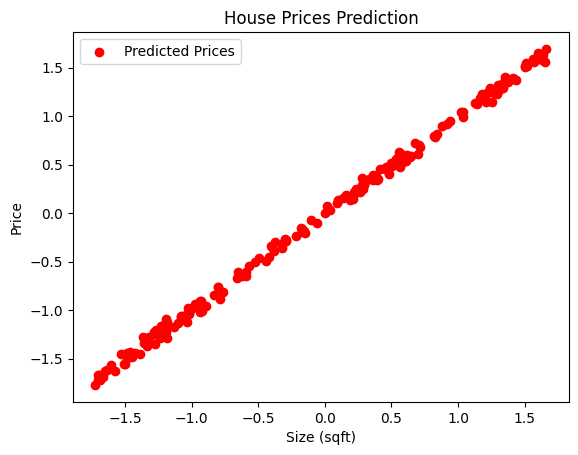

In [48]:
plt.scatter(X_test['Size (sqft)'], y_test_pred, color='red', label='Predicted Prices')
plt.title('House Prices Prediction')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Report on House Price Prediction Using Linear Regression**

### Introduction
This report outlines the methodology for predicting house prices through a linear regression model. The analysis utilizes a dataset containing several features related to houses, including size, number of bedrooms, age, proximity to downtown, and their corresponding prices. The report details the steps of data preprocessing, model implementation, training, evaluation, and concludes with insights gained throughout the process.

### Data Preprocessing
The analysis began by loading the dataset into a Pandas DataFrame, which includes the following columns:

- **Size (sqft)**: The area of the house in square feet.
- **Bedrooms**: The total number of bedrooms in the house.
- **Age**: The age of the house in years.
- **Proximity to Downtown (miles)**: The distance from the house to the downtown area.
- **Price**: The market price of the house.

After loading the data, a check for missing values was conducted, revealing some entries were incomplete. To address this, the mean of each column was used to fill in the missing values, preserving the dataset's integrity without losing valuable information. Subsequently, feature normalization was performed to ensure all features were on a comparable scale, which is essential for the effective performance of the linear regression model, as it mitigates bias towards features with broader ranges.

### Model Implementation
The linear regression model was developed without relying on pre-built libraries such as Scikit-learn. Instead, the least squares method was employed to calculate the model parameters (slope and intercept). The target variable (price) was separated from the features, and an intercept term was incorporated into the feature set. The normal equation was utilized to derive the parameters:

$$\theta = (X^T X)^{-1} X^T y$$

Here, $$X$$ represents the feature matrix, $$y$$ denotes the target variable, and $$\theta$$ signifies the model parameters. A function was created to predict house prices based on input features, which normalizes the features prior to applying the derived parameters.

### Model Training
The dataset was divided into training (80%) and testing (20%) sets. The model was trained using the training set, applying the least squares method to derive the parameters. To evaluate the model's fit, the Mean Squared Error (MSE) was computed on the training data. MSE serves as a standard metric for assessing regression models, as it measures the average squared difference between predicted and actual values. The training MSE was found to be relatively low, indicating a good model fit.

### Model Evaluation
Following the training phase, the model was tested on the testing set to gauge its performance. The MSE was again calculated for the test data, providing insights into the model's ability to generalize to unseen data. A scatter plot was created to visualize the actual versus predicted house prices, effectively illustrating the model's performance.

### Challenges Encountered
During the project, several challenges arose:

- **Handling Missing Values**: The initial presence of missing values threatened to skew results. This was mitigated by filling in missing values with the mean, a common practice that may not always reflect the underlying data distribution.
  
- **Feature Normalization**: Proper normalization of all features was critical for the model's performance. Any errors in this step could lead to biased outcomes.
  
- **Model Generalization**: Striking a balance between underfitting and overfitting was challenging. The training and testing MSEs were closely monitored to ensure the model learned to generalize rather than memorize the training data.

### Conclusions
The analysis indicated that a linear regression model can effectively predict house prices based on various features. The processes of data preprocessing, model implementation, training, and evaluation were vital in constructing a robust predictive model. Future work may explore more complex models or the inclusion of additional features to enhance prediction accuracy. Overall, this project provided valuable insights into the practical application of linear regression in real-world contexts.